In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Section 1 - Data Preparation

In [24]:
# Loading the data 
#x_train
X = pd.read_csv('/home/raghav/codes_new/Machine-Learning-from-scratch/01. Linear Regression/datasets/hardworkPaysOff/train/Linear_X_Train.csv')
#y_train
y = pd.read_csv('/home/raghav/codes_new/Machine-Learning-from-scratch/01. Linear Regression/datasets/hardworkPaysOff/train/Linear_Y_Train.csv')
X.shape,y.shape

((3750, 1), (3750, 1))

In [25]:
X.head()

,x
0,-0.289307
1,-0.588810
2,1.027507
3,-0.259013
4,0.782043


In [26]:
y.head()

,y
0,-0.091101
1,-53.467721
2,75.457009
3,-12.025286
4,57.414187


In [27]:
# converting X and y into numpy arrays using .values
X = X.values
y = y.values


In [28]:
# Normalisation - substract by mean and divide by standard deviation
u = X.mean()
std = X.std()
X = (X-u)/std

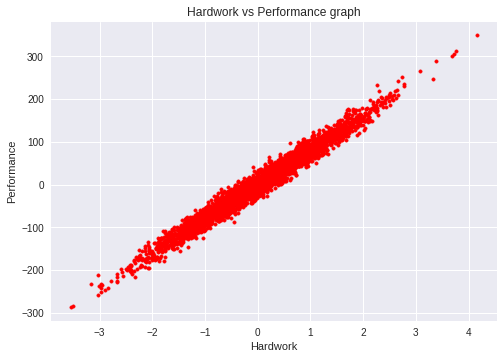

In [29]:
# Visualise
plt.style.use('seaborn')
plt.scatter(X,y,color='red',marker='.')
plt.title('Hardwork vs Performance graph')
plt.xlabel('Hardwork')
plt.ylabel('Performance')
plt.show()

### Section 2 - Modelling

In [30]:
# Function to compute hypothesis (prediction)
def hypothesis(x,theta):
    #theta = [theta0,theta1]
    return theta[0] + theta[1]*x


# Function to find gradient
# capital X, capital Y denotes all values of X and Y
def gradient(X,Y,theta):
    m = X.shape[0]
    
    grad = np.zeros((2,))
    # grad = array([0., 0.])

    for i in range(m):
        x = X[i]
        y = Y[i]
        #y prediction
        y_ = hypothesis(x,theta)
        grad[0] += (y_ - y)
        grad[1] += (y_-y)*x
    return grad/m


def error(X,Y,theta):
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        total_error += (y_ - Y[i])**2
    return total_error/m
        
def gradientDescent(X,Y,max_step = 100, lr = 0.1):

    #initialise theta
    theta = np.zeros((2,))

    error_list = []
    theta_list = []
    
    for i in range(max_step):
        
        grad = gradient(X,Y,theta)

        e = error(X,Y,theta)
        error_list.append(e)
        theta_list.append((theta[0],theta[1]))
        #update theta
        theta[0] = theta[0] -  lr*grad[0]
        theta[1] = theta[1] -  lr*grad[1]
        
        
    return theta,error_list,theta_list


In [31]:
theta, error_list, theta_list = gradientDescent(X,y)

In [32]:
theta

array([ 0.6838508 , 79.90361453])

In [33]:
theta_list

[(0.0, 0.0),
 (0.06838689680155917, 7.990573694249979),
 (0.12993510392296193, 15.182090019074964),
 (0.18532849033222448, 21.654454711417454),
 (0.23518253810056094, 27.479582934525695),
 (0.2800511810920642, 32.72219833532309),
 (0.3204329597844163, 37.44055219604077),
 (0.3567765606075334, 41.68707067068668),
 (0.3894858013483389, 45.508937297867995),
 (0.41892411801506385, 48.94861726233117),
 (0.44541860301511615, 52.044329230348026),
 (0.4692636395151634, 54.83047000156319),
 (0.49072417236520605, 57.337996695656855),
 (0.5100386519302442, 59.594770720341145),
 (0.5274216835387785, 61.62586734255701),
 (0.5430664119864594, 63.45385430255129),
 (0.5571466675893723, 65.09904256654615),
 (0.5698188976319938, 66.57971200414151),
 (0.5812239046703533, 67.91231449797735),
 (0.5914884110048769, 69.11165674242959),
 (0.600726466705948, 70.19106476243661),
 (0.6090407168369121, 71.16253198044294),
 (0.6165235419547794, 72.03685247664862),
 (0.6232580845608604, 72.82374092323374),
 (0.6293

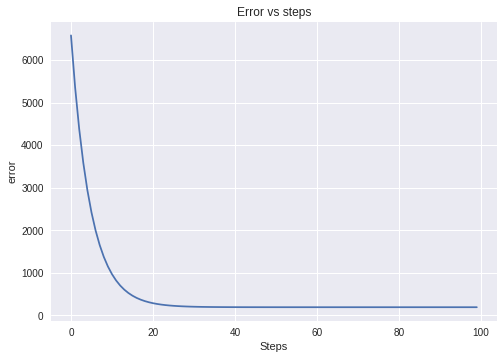

In [34]:
plt.style.use('seaborn')
plt.title("Error vs steps")
plt.xlabel("Steps")
plt.ylabel("error")
plt.plot(error_list)
plt.show()

In [35]:
print(len(theta_list))

100


### Section 3 - Prediction

In [36]:
y_ = hypothesis(X,theta)
print(y_)

[[-19.5733619 ]
 [-43.69571729]
 [ 86.4848761 ]
 ...
 [-20.85044708]
 [138.70197319]
 [-35.87897262]]


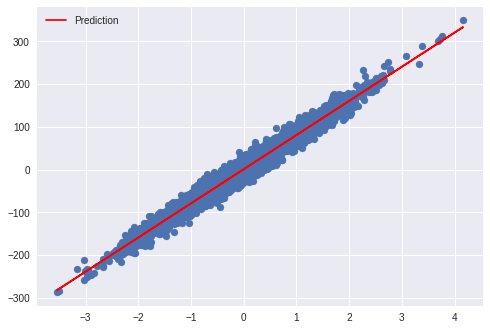

In [37]:
# Training data + Predictions
plt.scatter(X,y)
plt.plot(X,y_,color = 'red',label='Prediction')
plt.legend()
plt.show()

In [39]:
# Loading the test data
X_test = pd.read_csv('/home/raghav/codes_new/Machine-Learning-from-scratch/01. Linear Regression/datasets/hardworkPaysOff/test/Linear_X_Test.csv').values
y_test_pred = hypothesis(X_test,theta)

In [40]:
y_test_pred.shape

(1250, 1)

In [41]:
y_test_pred

array([[-149.37069577],
       [ -68.75494042],
       [-201.48687035],
       ...,
       [  10.9121384 ],
       [ -21.53235759],
       [ -53.68460035]])

In [42]:
#creating submission file
df = pd.DataFrame(data = y_test_pred,columns=["y"])

In [43]:
df

,y
0,-149.370696
1,-68.754940
2,-201.486870
3,221.234243
4,47.906897
...,...
1245,-12.744630
1246,75.171802
1247,10.912138
1248,-21.532358


In [44]:
df.to_csv('y_prediction_eg1.csv',index=False)

### Section 4 - Computing Score
Score : R2(R-Squared) or Coefficient of Determination

In [45]:
def r2_score(Y,Y_):
    #broadcasting will happen here
    num = np.sum((Y-Y_)**2)
    denom = np.sum((Y - Y.mean())**2)
    score = (1 - num/denom)
    return score*100

In [46]:
r2_score(y,y_)

97.09612226971643

### Section 5
#### Visualising Loss Function, Gradient Descent, Theta Updates

In [47]:
from mpl_toolkits.mplot3d import Axes3D

In [48]:
#save the theta_list in a file
np.save("ThetaList.npy",theta_list)

In [49]:
# Lets plot the changes in values of theta
theta_list = np.array(theta_list)
# theta_list

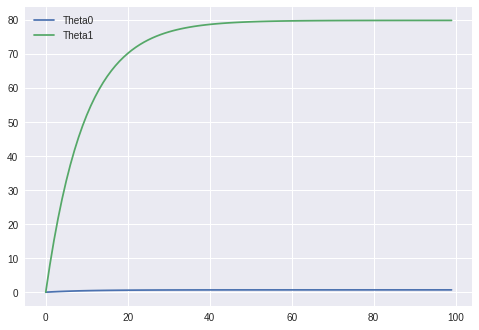

In [50]:
plt.plot(theta_list[:,0],label="Theta0")
plt.plot(theta_list[:,1],label="Theta1")
plt.legend()


In [51]:
T0 = np.arange(-40,40,1)
T1 = np.arange(40,120,1)
m = X.shape[0]

T0,T1 = np.meshgrid(T0,T1)

J = np.zeros(T0.shape)
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        y_ = T1[i,j]*X + T0[i,j]
        J[i,j] = np.sum((y-y_)**2)/m

/tmp/ipykernel_40959/1193988828.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axes = fig.gca(projection='3d')


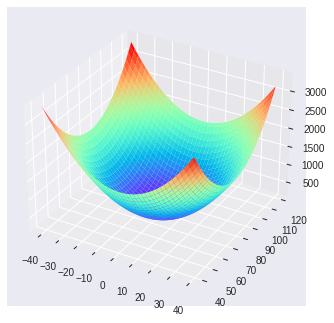

In [55]:
fig = plt.figure()

#below axes object will give me 3d plot
axes = fig.gca(projection='3d')
##x,y,z
axes.plot_surface(T0,T1,J,cmap = 'rainbow')
plt.show()

### Trajectory traced by Theta Updates in the Loss function

/tmp/ipykernel_40959/303694138.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axes = fig.gca(projection='3d')


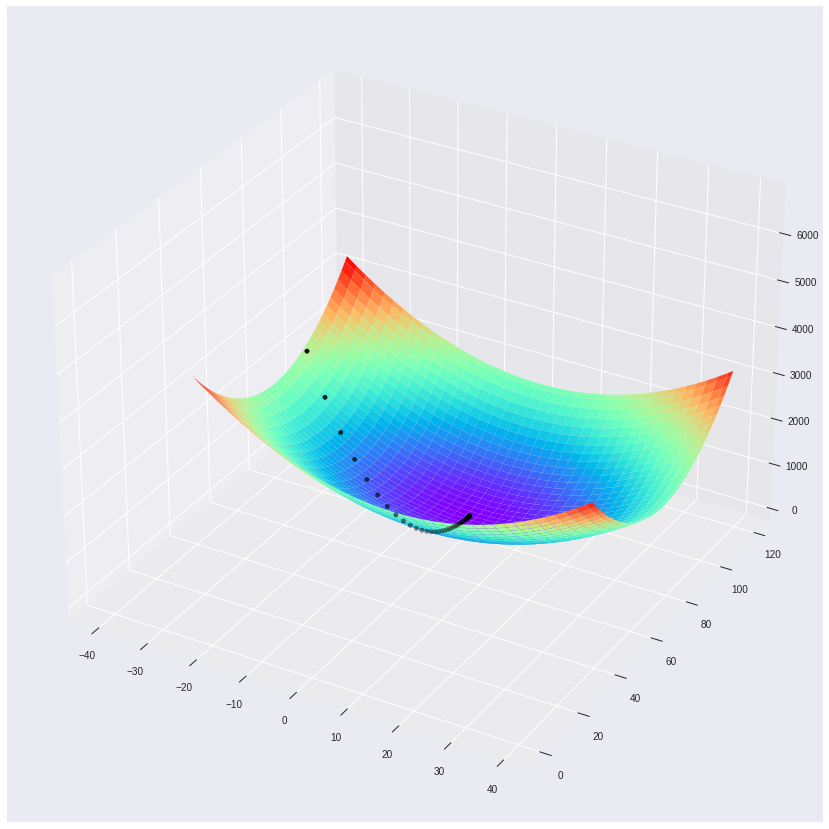

In [63]:
fig = plt.figure(figsize=(15,15))

#below axes object will give me 3d plot
axes = fig.gca(projection='3d')
##x,y,z
axes.plot_surface(T0,T1,J,cmap = 'rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list,marker= "o",c='black')

plt.show()

/tmp/ipykernel_40959/2415896503.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axes = fig.gca(projection='3d')


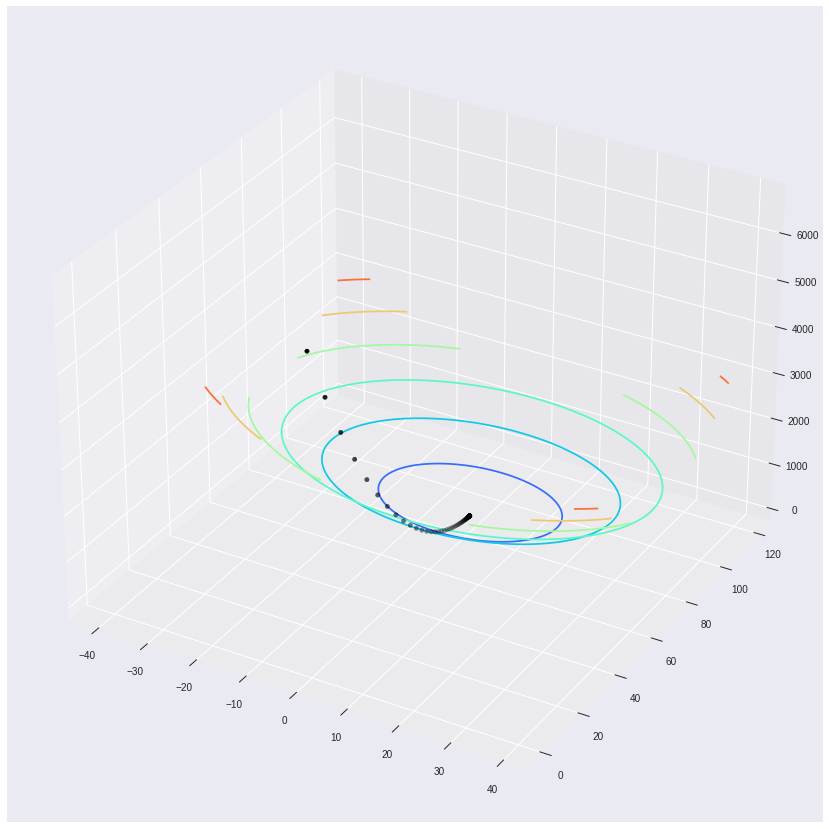

In [64]:
fig = plt.figure(figsize=(15,15))

#below axes object will give me 3d plot
axes = fig.gca(projection='3d')
##x,y,z
axes.contour(T0,T1,J,cmap = 'rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list,marker= "o",c='black')

plt.show()